**Dataset Loading and Preprocessing**

In [58]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive', force_remount=True)
file_path = '/content/drive/My Drive/Dataset.csv'
df8 = pd.read_csv(file_path)

Mounted at /content/drive


In [59]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552210 entries, 0 to 1552209
Data columns (total 44 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1552210 non-null  int64  
 1   Hour              1552210 non-null  int64  
 2   HR                1398811 non-null  float64
 3   O2Sat             1349474 non-null  float64
 4   Temp              525226 non-null   float64
 5   SBP               1325945 non-null  float64
 6   MAP               1358940 non-null  float64
 7   DBP               1065656 non-null  float64
 8   Resp              1313875 non-null  float64
 9   EtCO2             57636 non-null    float64
 10  BaseExcess        84145 non-null    float64
 11  HCO3              65028 non-null    float64
 12  FiO2              129365 non-null   float64
 13  pH                107573 non-null   float64
 14  PaCO2             86301 non-null    float64
 15  SaO2              53561 non-null    float64
 16  

In [60]:
import pandas as pd
import numpy as np

df8 = pd.read_csv("/content/drive/My Drive/Dataset.csv")
threshold = 0.5 * len(df8)
df8_cleaned = df8.dropna(thresh=threshold, axis=1)
numeric_columns_all = df8_cleaned.select_dtypes(include=[np.number]).columns
exclude_cols = ["SepsisLabel","Gender","Patient_ID","Unnamed: 0"]
numeric_cols_for_outliers = numeric_columns_all.drop(exclude_cols, errors="ignore")
df8_cleaned.loc[:, numeric_columns_all] = df8_cleaned[numeric_columns_all].fillna(df8_cleaned[numeric_columns_all].median())
Q1 = df8_cleaned[numeric_cols_for_outliers].quantile(0.25)
Q3 = df8_cleaned[numeric_cols_for_outliers].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = (df8_cleaned[numeric_cols_for_outliers] < (Q1 - 1.5 * IQR)) | (df8_cleaned[numeric_cols_for_outliers] > (Q3 + 1.5 * IQR))
df8_cleaned = df8_cleaned[~outlier_condition.any(axis=1)]
print(df8_cleaned.shape)
print(df8_cleaned.info())
print(df8_cleaned.columns.tolist())
print(df8_cleaned["SepsisLabel"].value_counts())


(1038119, 16)
<class 'pandas.core.frame.DataFrame'>
Index: 1038119 entries, 0 to 1552209
Data columns (total 16 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Unnamed: 0   1038119 non-null  int64  
 1   Hour         1038119 non-null  int64  
 2   HR           1038119 non-null  float64
 3   O2Sat        1038119 non-null  float64
 4   SBP          1038119 non-null  float64
 5   MAP          1038119 non-null  float64
 6   DBP          1038119 non-null  float64
 7   Resp         1038119 non-null  float64
 8   Age          1038119 non-null  float64
 9   Gender       1038119 non-null  int64  
 10  Unit1        1038119 non-null  float64
 11  Unit2        1038119 non-null  float64
 12  HospAdmTime  1038119 non-null  float64
 13  ICULOS       1038119 non-null  int64  
 14  SepsisLabel  1038119 non-null  int64  
 15  Patient_ID   1038119 non-null  int64  
dtypes: float64(10), int64(6)
memory usage: 134.6 MB
None
['Unnamed: 0', 'Hour', 'HR',

In [61]:
import pandas as pd
import numpy as np
features = ["HR", "O2Sat", "SBP", "MAP", "DBP", "Resp", "Age", "HospAdmTime", "ICULOS"]
orig_file = '/content/drive/My Drive/SepsisDataset.csv'
df_orig = pd.read_csv(orig_file)
df_orig.drop(columns=["Unnamed: 0.1", "Unnamed: 0"], inplace=True)
grouped = df_orig.groupby("Patient_ID")
agg_orig = grouped[features].mean().reset_index()
agg_orig["SepsisLabel"] = grouped["SepsisLabel"].max().values.astype(int)
print("=== Summary Statistics for Original Aggregated Dataset ===")
print(agg_orig[features + ["SepsisLabel"]].describe())
print("\nClass Distribution (Original Aggregated):")
print(agg_orig["SepsisLabel"].value_counts())

=== Summary Statistics for Original Aggregated Dataset ===
                 HR         O2Sat           SBP           MAP           DBP  \
count  35040.000000  35040.000000  35040.000000  35040.000000  35040.000000   
mean      82.925130     97.528570    121.432962     80.501435     62.069736   
std       11.792514      1.290258     12.787833      7.899476      5.026883   
min       45.800000     92.214286     79.428571     52.103448     46.000000   
25%       74.864865     96.673077    112.518887     74.917500     59.210835   
50%       82.552632     97.666667    120.862069     80.130753     62.000000   
75%       90.634615     98.465517    129.458615     85.602393     64.856113   
max      121.363636    100.000000    166.130435    115.500000     80.000000   

               Resp           Age   HospAdmTime        ICULOS   SepsisLabel  
count  35040.000000  35040.000000  35040.000000  35040.000000  35040.000000  
mean      18.091542     61.464275    -16.393084     19.106998      0.0487

In [63]:
agg_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Patient_ID   35040 non-null  int64  
 1   HR           35040 non-null  float64
 2   O2Sat        35040 non-null  float64
 3   SBP          35040 non-null  float64
 4   MAP          35040 non-null  float64
 5   DBP          35040 non-null  float64
 6   Resp         35040 non-null  float64
 7   Age          35040 non-null  float64
 8   HospAdmTime  35040 non-null  float64
 9   ICULOS       35040 non-null  float64
 10  SepsisLabel  35040 non-null  int64  
dtypes: float64(9), int64(2)
memory usage: 2.9 MB


In [67]:
agg_orig = agg_orig.rename(columns={"SepsisLabel": "label"})
print(agg_orig.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Patient_ID   35040 non-null  int64  
 1   HR           35040 non-null  float64
 2   O2Sat        35040 non-null  float64
 3   SBP          35040 non-null  float64
 4   MAP          35040 non-null  float64
 5   DBP          35040 non-null  float64
 6   Resp         35040 non-null  float64
 7   Age          35040 non-null  float64
 8   HospAdmTime  35040 non-null  float64
 9   ICULOS       35040 non-null  float64
 10  label        35040 non-null  int64  
dtypes: float64(9), int64(2)
memory usage: 2.9 MB
None


In [68]:
agg_orig.to_csv('agg_orig.csv', index=False)
from google.colab import files
files.download('agg_orig.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [69]:
import pandas as pd
import numpy as np
df = pd.read_csv("agg_orig.csv")
label_counts = df["label"].value_counts()
print("Label Distribution:")
print(label_counts)

Label Distribution:
label
0    33332
1     1708
Name: count, dtype: int64


In [70]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
df = pd.read_csv("agg_orig.csv")
feature_cols = [c for c in df.columns if c!="label"]
data = df[df["label"]==1][feature_cols].values
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
data_tensor = torch.tensor(data,dtype=torch.float).to(device)
batch_size = 64
latent_dim = 16
class Generator(nn.Module):
    def __init__(self,input_dim,output_dim):
        super(Generator,self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim,128),
            nn.ReLU(),
            nn.Linear(128,256),
            nn.ReLU(),
            nn.Linear(256,256),
            nn.ReLU(),
            nn.Linear(256,128),
            nn.ReLU(),
            nn.Linear(128,output_dim)
        )
    def forward(self,z):
        return self.net(z)
class Critic(nn.Module):
    def __init__(self,input_dim):
        super(Critic,self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim,256),
            nn.LeakyReLU(0.2),
            nn.Linear(256,256),
            nn.LeakyReLU(0.2),
            nn.Linear(256,128),
            nn.LeakyReLU(0.2),
            nn.Linear(128,1)
        )
    def forward(self,x):
        return self.net(x)
generator = Generator(latent_dim,len(feature_cols)).to(device)
critic = Critic(len(feature_cols)).to(device)
optimizer_G = optim.Adam(generator.parameters(),lr=1e-4,betas=(0.5,0.9))
optimizer_C = optim.Adam(critic.parameters(),lr=1e-4,betas=(0.5,0.9))
def gradient_penalty(real_data,fake_data):
    alpha = torch.rand(real_data.size(0),1).to(device)
    alpha = alpha.expand(real_data.size())
    interpolates = alpha*real_data+(1-alpha)*fake_data
    interpolates.requires_grad_(True)
    disc_interpolates = critic(interpolates)
    gradients = torch.autograd.grad(disc_interpolates,interpolates,torch.ones(disc_interpolates.size()).to(device),True,True,True)[0]
    return ((gradients.view(gradients.size(0),-1).norm(2,dim=1)-1)**2).mean()
epochs = 100
n_critic = 5
lambda_gp = 10
dataset = torch.utils.data.TensorDataset(data_tensor)
dataloader = torch.utils.data.DataLoader(dataset,batch_size=batch_size,shuffle=True)
for epoch in range(epochs):
    for i,(real,) in enumerate(dataloader):
        real = real.to(device)
        for _ in range(n_critic):
            z = torch.randn(real.size(0),latent_dim).to(device)
            fake = generator(z)
            critic_real = critic(real).mean()
            critic_fake = critic(fake).mean()
            gp = gradient_penalty(real,fake)
            loss_c = -(critic_real - critic_fake) + lambda_gp*gp
            optimizer_C.zero_grad()
            loss_c.backward()
            optimizer_C.step()
        z = torch.randn(real.size(0),latent_dim).to(device)
        fake = generator(z)
        loss_g = -critic(fake).mean()
        optimizer_G.zero_grad()
        loss_g.backward()
        optimizer_G.step()
generator.eval()
num_samples_to_generate = 33332 - len(data)
z = torch.randn(num_samples_to_generate,latent_dim).to(device)
synthetic_data = generator(z).detach().cpu().numpy()
col_idx = {col_name: i for i,col_name in enumerate(feature_cols)}
sat_mask = synthetic_data[:,col_idx["O2Sat"]] > 100
count_over_100 = np.sum(sat_mask)
synthetic_data[sat_mask,col_idx["O2Sat"]] = np.random.uniform(96,99,count_over_100)
shock_fraction = 0.2
shock_count = int(shock_fraction*synthetic_data.shape[0])
shock_indices = np.random.choice(synthetic_data.shape[0],shock_count,False)
synthetic_data[shock_indices,col_idx["SBP"]] = np.random.uniform(70,90,shock_count)
synthetic_data[shock_indices,col_idx["DBP"]] = np.random.uniform(40,60,shock_count)
synthetic_data[shock_indices,col_idx["MAP"]] = np.random.uniform(50,65,shock_count)
synthetic_data[shock_indices,col_idx["O2Sat"]] = np.random.uniform(80,92,shock_count)
synthetic_data[shock_indices,col_idx["Resp"]] = np.random.uniform(21,30,shock_count)
super_shock_count = int(0.1*shock_count)
super_shock_indices = np.random.choice(shock_indices,super_shock_count,False)
synthetic_data[super_shock_indices,col_idx["Resp"]] = np.random.uniform(31,40,super_shock_count)
total_syn = synthetic_data.shape[0]
group_size = total_syn//3
indices = np.arange(total_syn)
np.random.shuffle(indices)
group1 = indices[:group_size]
group2 = indices[group_size:2*group_size]
group3 = indices[2*group_size:]
synthetic_data[group1,col_idx["Age"]] = np.random.uniform(18,40,len(group1))
synthetic_data[group2,col_idx["Age"]] = np.random.uniform(41,65,len(group2))
synthetic_data[group3,col_idx["Age"]] = np.random.uniform(66,100,len(group3))
balanced_real = df[df["label"]==0][feature_cols].values
balanced_real_label = np.zeros((balanced_real.shape[0],1))
minority_real_label = np.ones((data.shape[0],1))
synthetic_label = np.ones((synthetic_data.shape[0],1))
balanced_df = np.concatenate([balanced_real,balanced_real_label],1)
minority_df = np.concatenate([data,minority_real_label],1)
synthetic_df = np.concatenate([synthetic_data,synthetic_label],1)
final_data = np.concatenate([balanced_df,minority_df,synthetic_df],0)
all_columns = feature_cols+["label"]
pd.DataFrame(final_data,columns=all_columns).to_csv("GAN_balanced_data_names_modified.csv",index=False)


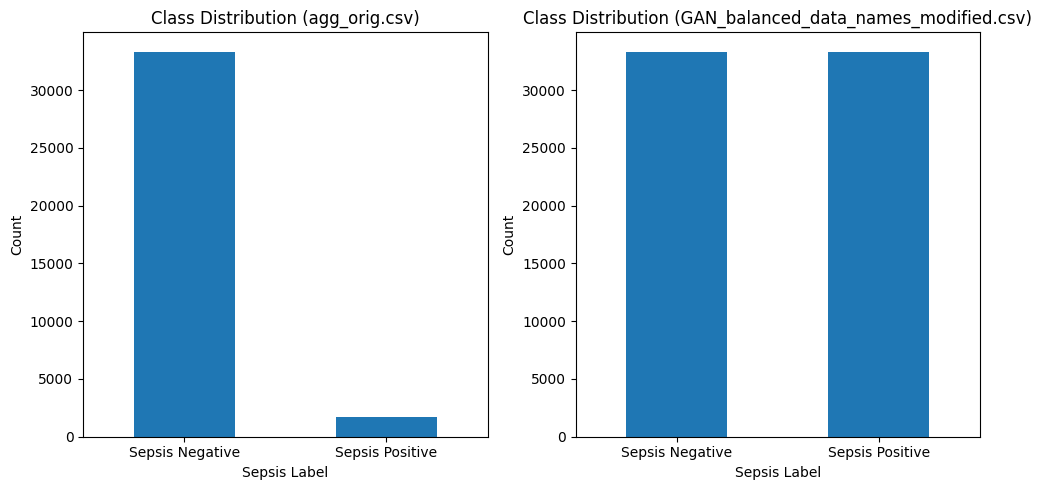

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
df_orig = pd.read_csv('agg_orig.csv')
df_gan = pd.read_csv('GAN_balanced_data_names_modified.csv')
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df_orig['label'].value_counts().plot(kind='bar', title='Class Distribution (agg_orig.csv)')
plt.xlabel('Sepsis Label')
plt.ylabel('Count')
plt.xticks([0, 1], ['Sepsis Negative', 'Sepsis Positive'], rotation=0)
plt.subplot(1, 2, 2)
df_gan['label'].value_counts().plot(kind='bar', title='Class Distribution (GAN_balanced_data_names_modified.csv)')
plt.xlabel('Sepsis Label')
plt.ylabel('Count')
plt.xticks([0, 1], ['Sepsis Negative', 'Sepsis Positive'], rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
df2 = pd.read_csv("GAN_balanced_data_names_modified.csv")

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66664 entries, 0 to 66663
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HR           66664 non-null  float64
 1   O2Sat        66664 non-null  float64
 2   SBP          66664 non-null  float64
 3   MAP          66664 non-null  float64
 4   DBP          66664 non-null  float64
 5   Resp         66664 non-null  float64
 6   Age          66664 non-null  float64
 7   HospAdmTime  66664 non-null  float64
 8   ICULOS       66664 non-null  float64
 9   label        66664 non-null  float64
dtypes: float64(10)
memory usage: 5.1 MB


In [ ]:
df2.describe()

,HR,O2Sat,SBP,MAP,DBP,Resp,Age,HospAdmTime,ICULOS,label
count,66664.000000,66664.000000,66664.000000,66664.000000,66664.000000,66664.000000,66664.000000,66664.000000,66664.000000,66664.000000
mean,83.216144,90.567436,115.352495,76.762503,59.803356,18.956241,58.370166,-15.196233,16.626167,0.500000
std,21.837058,13.227041,29.277456,20.116046,14.366079,4.444782,20.350703,24.514666,7.546277,0.500004
min,22.470325,23.580223,30.123676,17.625551,14.250435,5.996705,18.002075,-125.041504,1.000000,0.000000
25%,70.018049,88.092745,97.616138,64.566944,52.765555,16.263199,43.191761,-23.950000,10.650000,0.000000
50%,81.647393,96.800000,116.569444,77.432576,61.211238,18.200000,59.432625,-5.750000,16.000000,0.500000
75%,93.611745,98.030640,129.764706,86.000000,65.333333,20.956784,74.000000,-0.030000,22.107143,1.000000
max,258.529602,100.000000,358.752411,246.707855,186.249817,49.377369,100.000000,42.846077,52.130435,1.000000


In [ ]:
import pandas as pd
import numpy as np
df_final = pd.read_csv("GAN_balanced_data_names_modified.csv")
label_counts = df_final["label"].value_counts()
print("Label Distribution:")
print(label_counts)
print("\nRatio of Label 1 to Label 0:", label_counts[1] / label_counts[0])
bins = [0, 40, 65, 200]
age_labels = ["18-40", "41-65", "66+"]
df_final["Age_Group"] = pd.cut(df_final["Age"], bins=bins, labels=age_labels)
print("\nAge Group Distribution (Overall):")
print(df_final["Age_Group"].value_counts())
print("\nAge Group Distribution by Label:")
print(pd.crosstab(df_final["Age_Group"], df_final["label"]))
df_positives = df_final[df_final["label"] == 1]
print("\nAge Group Distribution among Sepsis Positives (label=1):")
print(df_positives["Age_Group"].value_counts())


Label Distribution:
label
0.0    33332
1.0    33332
Name: count, dtype: int64

Ratio of Label 1 to Label 0: 1.0

Age Group Distribution (Overall):
Age_Group
66+      26354
41-65    25696
18-40    14614
Name: count, dtype: int64

Age Group Distribution by Label:
label        0.0    1.0
Age_Group              
18-40       3870  10744
41-65      14448  11248
66+        15014  11340

Age Group Distribution among Sepsis Positives (label=1):
Age_Group
66+      11340
41-65    11248
18-40    10744
Name: count, dtype: int64


**Running ML classifiers on both balanced and imbalanced datasets**

In [ ]:
df1 = pd.read_csv("Updated_Non-Time-Series_Sepsis_Dataset_Ordered.csv")
df2 = pd.read_csv("GAN_balanced_data_names_modified.csv")

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

X = df1.drop('label', axis=1)
y = df1['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifiers = [
    ("Logistic Regression", LogisticRegression(random_state=42, max_iter=1000)),
    ("KNN", KNeighborsClassifier()),
    ("SVC", SVC(random_state=42)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(n_estimators=100, random_state=42)),
    ("GaussianNB", GaussianNB()),
    ("AdaBoost", AdaBoostClassifier(random_state=42)),
    ("GradientBoosting", GradientBoostingClassifier(random_state=42)),
    ("ExtraTrees", ExtraTreesClassifier(n_estimators=100, random_state=42)),
    ("MLP", MLPClassifier(random_state=42, max_iter=1000))
]

for name, clf in classifiers:
    pipeline = Pipeline([('scaler', StandardScaler()), ('classifier', clf)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print(name)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    print("\n")


Logistic Regression
Confusion Matrix:
[[6678    0]
 [ 330    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      6678
           1       0.00      0.00      0.00       330

    accuracy                           0.95      7008
   macro avg       0.48      0.50      0.49      7008
weighted avg       0.91      0.95      0.93      7008

Accuracy Score: 0.9529109589041096


KNN
Confusion Matrix:
[[6664   14]
 [ 322    8]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      6678
           1       0.36      0.02      0.05       330

    accuracy                           0.95      7008
   macro avg       0.66      0.51      0.51      7008
weighted avg       0.93      0.95      0.93      7008

Accuracy Score: 0.952054794520548


SVC
Confusion Matrix:
[[6678    0]
 [ 330    0]]

Classification Report:
              precision    recall  f1-

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

X = df2.drop('label', axis=1)
y = df2['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifiers = [
    ("Logistic Regression", LogisticRegression(random_state=42, max_iter=1000)),
    ("KNN", KNeighborsClassifier()),
    ("SVC", SVC(random_state=42)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(n_estimators=100, random_state=42)),
    ("GaussianNB", GaussianNB()),
    ("AdaBoost", AdaBoostClassifier(random_state=42)),
    ("GradientBoosting", GradientBoostingClassifier(random_state=42)),
    ("ExtraTrees", ExtraTreesClassifier(n_estimators=100, random_state=42)),
    ("MLP", MLPClassifier(random_state=42, max_iter=1000))
]

for name, clf in classifiers:
    pipeline = Pipeline([('scaler', StandardScaler()), ('classifier', clf)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print(name)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    print("\n")


Logistic Regression
Confusion Matrix:
[[6113  526]
 [ 962 5732]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.92      0.89      6639
         1.0       0.92      0.86      0.89      6694

    accuracy                           0.89     13333
   macro avg       0.89      0.89      0.89     13333
weighted avg       0.89      0.89      0.89     13333

Accuracy Score: 0.8883972099302483


KNN
Confusion Matrix:
[[6480  159]
 [ 319 6375]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96      6639
         1.0       0.98      0.95      0.96      6694

    accuracy                           0.96     13333
   macro avg       0.96      0.96      0.96     13333
weighted avg       0.96      0.96      0.96     13333

Accuracy Score: 0.9641491037275932


SVC
Confusion Matrix:
[[6519  120]
 [ 543 6151]]

Classification Report:
              precision    recall  f1

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

X = df1.drop('label', axis=1)
y = df1['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifiers = [
    ("Logistic Regression", LogisticRegression(random_state=42, max_iter=1000)),
    ("KNN", KNeighborsClassifier()),
    ("SVC", SVC(random_state=42)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(n_estimators=100, random_state=42)),
    ("GaussianNB", GaussianNB()),
    ("AdaBoost", AdaBoostClassifier(random_state=42)),
    ("GradientBoosting", GradientBoostingClassifier(random_state=42)),
    ("ExtraTrees", ExtraTreesClassifier(n_estimators=100, random_state=42)),
    ("MLP", MLPClassifier(random_state=42, max_iter=1000))
]

param_grids = {
    "Logistic Regression": {
        'classifier__C': [0.1, 1, 10],
        'classifier__penalty': ['l2']
    },
    "KNN": {
        'classifier__n_neighbors': [3, 5, 7],
        'classifier__weights': ['uniform', 'distance']
    },
    "SVC": {
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf']
    },
    "Decision Tree": {
        'classifier__max_depth': [5, 10, None],
        'classifier__min_samples_split': [2, 5, 10]
    },
    "Random Forest": {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [10, 20, None]
    },
    "GaussianNB": {},
    "AdaBoost": {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.01, 0.1, 1]
    },
    "GradientBoosting": {
        'classifier__n_estimators': [50, 100],
        'classifier__learning_rate': [0.01, 0.1],
        'classifier__max_depth': [3, 5]
    },
    "ExtraTrees": {
        'classifier__n_estimators': [50, 100],
        'classifier__max_depth': [10, 20, None]
    },
    "MLP": {
        'classifier__hidden_layer_sizes': [(50,), (100,)],
        'classifier__activation': ['tanh', 'relu']
    }
}

for name, clf in classifiers:
    pipeline = Pipeline([('scaler', StandardScaler()), ('classifier', clf)])

    if name in param_grids:
        grid_search = GridSearchCV(pipeline, param_grid=param_grids[name], cv=5, scoring='accuracy')
        grid_search.fit(X_train, y_train)

        print(f"Best parameters for {name}: {grid_search.best_params_}")
        y_pred = grid_search.predict(X_test)
    else:
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)

    cv_scores = cross_val_score(pipeline, X, y, cv=7, scoring='accuracy')
    print(f"{name}")
    print(f"Mean CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    print("\n")


Best parameters for Logistic Regression: {'classifier__C': 0.1, 'classifier__penalty': 'l2'}
Logistic Regression
Mean CV Accuracy: 0.9512 (+/- 0.0001)
Confusion Matrix:
[[6678    0]
 [ 330    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      6678
           1       0.00      0.00      0.00       330

    accuracy                           0.95      7008
   macro avg       0.48      0.50      0.49      7008
weighted avg       0.91      0.95      0.93      7008

Accuracy Score: 0.9529109589041096


Best parameters for KNN: {'classifier__n_neighbors': 7, 'classifier__weights': 'distance'}
KNN
Mean CV Accuracy: 0.9505 (+/- 0.0004)
Confusion Matrix:
[[6668   10]
 [ 322    8]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      6678
           1       0.44      0.02      0.05       330

    accuracy                           0.95      7

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

X = df2.drop('label', axis=1)
y = df2['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifiers = [
    ("Logistic Regression", LogisticRegression(random_state=42, max_iter=1000)),
    ("KNN", KNeighborsClassifier()),
    ("SVC", SVC(random_state=42)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(n_estimators=100, random_state=42)),
    ("GaussianNB", GaussianNB()),
    ("AdaBoost", AdaBoostClassifier(random_state=42)),
    ("GradientBoosting", GradientBoostingClassifier(random_state=42)),
    ("ExtraTrees", ExtraTreesClassifier(n_estimators=100, random_state=42)),
    ("MLP", MLPClassifier(random_state=42, max_iter=1000))
]

param_grids = {
    "Logistic Regression": {
        'classifier__C': [0.1, 1, 10],
        'classifier__penalty': ['l2']
    },
    "KNN": {
        'classifier__n_neighbors': [3, 5, 7],
        'classifier__weights': ['uniform', 'distance']
    },
    "SVC": {
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf']
    },
    "Decision Tree": {
        'classifier__max_depth': [5, 10, None],
        'classifier__min_samples_split': [2, 5, 10]
    },
    "Random Forest": {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [10, 20, None]
    },
    "GaussianNB": {},
    "AdaBoost": {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.01, 0.1, 1]
    },
    "GradientBoosting": {
        'classifier__n_estimators': [50, 100],
        'classifier__learning_rate': [0.01, 0.1],
        'classifier__max_depth': [3, 5]
    },
    "ExtraTrees": {
        'classifier__n_estimators': [50, 100],
        'classifier__max_depth': [10, 20, None]
    },
    "MLP": {
        'classifier__hidden_layer_sizes': [(50,), (100,)],
        'classifier__activation': ['tanh', 'relu']
    }
}

for name, clf in classifiers:
    pipeline = Pipeline([('scaler', StandardScaler()), ('classifier', clf)])

    if name in param_grids:
        grid_search = GridSearchCV(pipeline, param_grid=param_grids[name], cv=5, scoring='accuracy')
        grid_search.fit(X_train, y_train)

        print(f"Best parameters for {name}: {grid_search.best_params_}")
        y_pred = grid_search.predict(X_test)
    else:
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)

    cv_scores = cross_val_score(pipeline, X, y, cv=7, scoring='accuracy')
    print(f"{name}")
    print(f"Mean CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    print("\n")


Best parameters for Logistic Regression: {'classifier__C': 10, 'classifier__penalty': 'l2'}
Logistic Regression
Mean CV Accuracy: 0.8857 (+/- 0.0410)
Confusion Matrix:
[[6114  525]
 [ 960 5734]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.92      0.89      6639
         1.0       0.92      0.86      0.89      6694

    accuracy                           0.89     13333
   macro avg       0.89      0.89      0.89     13333
weighted avg       0.89      0.89      0.89     13333

Accuracy Score: 0.8886222155553889


Best parameters for KNN: {'classifier__n_neighbors': 5, 'classifier__weights': 'distance'}
KNN
Mean CV Accuracy: 0.9635 (+/- 0.0611)
Confusion Matrix:
[[6480  159]
 [ 318 6376]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96      6639
         1.0       0.98      0.95      0.96      6694

    accuracy                           0.96     133

In [56]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

age_groups = {
    "18-40": df2[(df2['Age'] >= 18) & (df2['Age'] <= 40)],
    "41-65": df2[(df2['Age'] >= 41) & (df2['Age'] <= 65)],
    "66+": df2[df2['Age'] >= 66]
}

classifiers = [
    ("Logistic Regression", LogisticRegression(random_state=42, max_iter=1000)),
    ("KNN", KNeighborsClassifier()),
    ("SVC", SVC(random_state=42)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(n_estimators=100, random_state=42)),
    ("GaussianNB", GaussianNB()),
    ("AdaBoost", AdaBoostClassifier(random_state=42)),
    ("GradientBoosting", GradientBoostingClassifier(random_state=42)),
    ("ExtraTrees", ExtraTreesClassifier(n_estimators=100, random_state=42)),
    ("MLP", MLPClassifier(random_state=42, max_iter=1000))
]

param_grids = {
    "Logistic Regression": {
        'classifier__C': [0.1, 1, 10],
        'classifier__penalty': ['l2']
    },
    "KNN": {
        'classifier__n_neighbors': [3, 5, 7],
        'classifier__weights': ['uniform', 'distance']
    },
    "SVC": {
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf']
    },
    "Decision Tree": {
        'classifier__max_depth': [5, 10, None],
        'classifier__min_samples_split': [2, 5, 10]
    },
    "Random Forest": {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [10, 20, None]
    },
    "GaussianNB": {},
    "AdaBoost": {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.01, 0.1, 1]
    },
    "GradientBoosting": {
        'classifier__n_estimators': [50, 100],
        'classifier__learning_rate': [0.01, 0.1],
        'classifier__max_depth': [3, 5]
    },
    "ExtraTrees": {
        'classifier__n_estimators': [50, 100],
        'classifier__max_depth': [10, 20, None]
    },
    "MLP": {
        'classifier__hidden_layer_sizes': [(50,), (100,)],
        'classifier__activation': ['tanh', 'relu']
    }
}

for group_name, group_df in age_groups.items():
    print("Age Group:", group_name)
    X = group_df.drop('label', axis=1)
    y = group_df['label']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    for name, clf in classifiers:
        pipeline = Pipeline([('scaler', StandardScaler()), ('classifier', clf)])
        if name in param_grids:
            grid_search = GridSearchCV(pipeline, param_grid=param_grids[name], cv=5, scoring='accuracy')
            grid_search.fit(X_train, y_train)
            print("Best parameters for", name, ":", grid_search.best_params_)
            y_pred = grid_search.predict(X_test)
        else:
            pipeline.fit(X_train, y_train)
            y_pred = pipeline.predict(X_test)
        cv_scores = cross_val_score(pipeline, X, y, cv=7, scoring='accuracy')
        print(name)
        print("Mean CV Accuracy:", f"{cv_scores.mean():.4f}", "(+/-", f"{cv_scores.std():.4f})")
        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_pred))
        print("Classification Report:")
        print(classification_report(y_test, y_pred))
        print("Accuracy Score:", accuracy_score(y_test, y_pred))
        print("")


Age Group: 18-40
Best parameters for Logistic Regression : {'classifier__C': 1, 'classifier__penalty': 'l2'}
Logistic Regression
Mean CV Accuracy: 0.8939 (+/- 0.0235)
Confusion Matrix:
[[ 647  144]
 [ 158 1974]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.82      0.81       791
         1.0       0.93      0.93      0.93      2132

    accuracy                           0.90      2923
   macro avg       0.87      0.87      0.87      2923
weighted avg       0.90      0.90      0.90      2923

Accuracy Score: 0.8966814916182004

Best parameters for KNN : {'classifier__n_neighbors': 3, 'classifier__weights': 'uniform'}
KNN
Mean CV Accuracy: 0.9663 (+/- 0.0323)
Confusion Matrix:
[[ 740   51]
 [  27 2105]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95       791
         1.0       0.98      0.99      0.98      2132

    accuracy                         

**SHAP GRAPH**

Accuracy: 0.8583214282989502



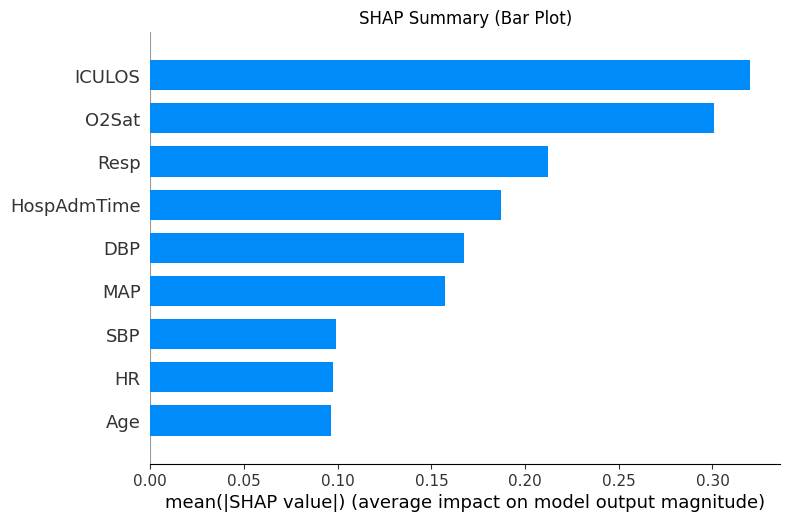

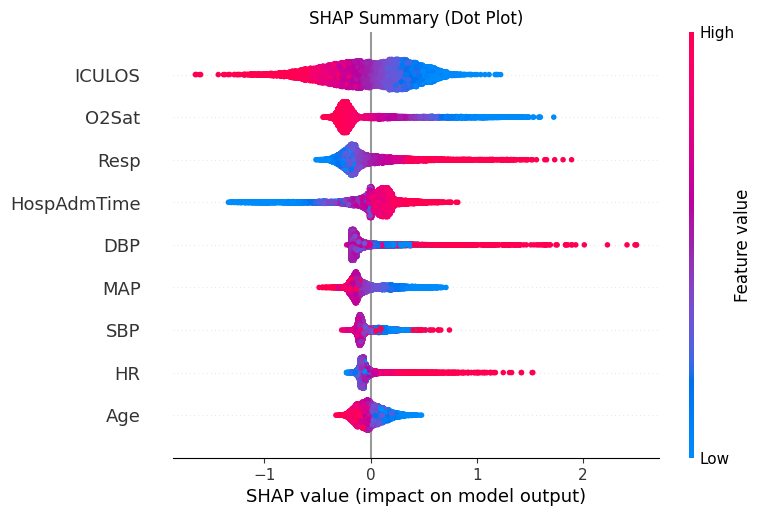

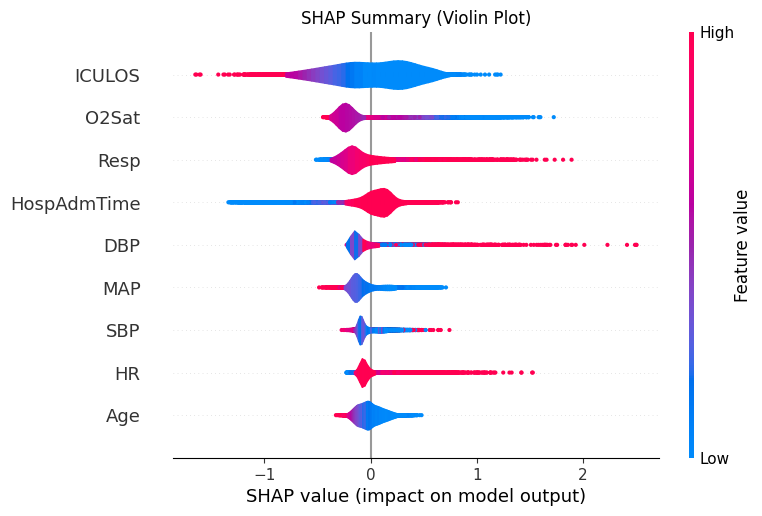

<Figure size 640x480 with 0 Axes>

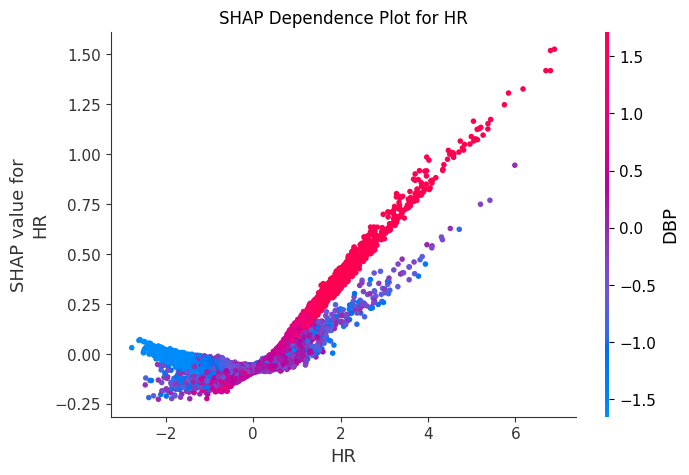

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import shap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

df2 = df2.reset_index(drop=True)
X = df2.drop("label", axis=1).values
y = df2["label"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train_t = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_t = torch.tensor(y_train, dtype=torch.float32).to(device)
X_test_t = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_t = torch.tensor(y_test, dtype=torch.float32).to(device)

class TabularNN(nn.Module):
    def __init__(self, input_dim):
        super(TabularNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.relu1 = nn.ReLU()
        self.drop1 = nn.Dropout(0.1)
        self.fc2 = nn.Linear(64, 32)
        self.relu2 = nn.ReLU()
        self.drop2 = nn.Dropout(0.1)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.drop1(x)
        x = self.relu2(self.fc2(x))
        x = self.drop2(x)
        x = self.fc3(x)
        return x

model = TabularNN(X_train.shape[1]).to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(50):
    model.train()
    optimizer.zero_grad()
    logits = model(X_train_t).squeeze()
    loss = criterion(logits, y_train_t)
    loss.backward()
    optimizer.step()

model.eval()
with torch.no_grad():
    test_logits = model(X_test_t).squeeze()
    preds = (torch.sigmoid(test_logits) > 0.5).float()
    acc = (preds == y_test_t).float().mean()
print("Accuracy:", acc.item())
print()

model.cpu().eval()
background_data = X_train[:100]
explainer = shap.DeepExplainer(model, torch.tensor(background_data, dtype=torch.float32))
shap_values = explainer.shap_values(torch.tensor(X_test, dtype=torch.float32))
if isinstance(shap_values, list) and len(shap_values) == 1:
    shap_values = shap_values[0]
if shap_values.ndim == 3 and shap_values.shape[-1] == 1:
    shap_values = shap_values.squeeze(-1)
feature_names = df2.drop("label", axis=1).columns

plt.figure()
shap.summary_plot(shap_values, X_test, feature_names=feature_names, plot_type="bar", show=False)
plt.title("SHAP Summary (Bar Plot)")
plt.show()

plt.figure()
shap.summary_plot(shap_values, X_test, feature_names=feature_names, plot_type="dot", show=False)
plt.title("SHAP Summary (Dot Plot)")
plt.show()

plt.figure()
shap.summary_plot(shap_values, X_test, feature_names=feature_names, plot_type="violin", show=False)
plt.title("SHAP Summary (Violin Plot)")
plt.show()

plt.figure()
shap.dependence_plot(0, shap_values, X_test, feature_names=feature_names, show=False)
plt.title(f"SHAP Dependence Plot for {feature_names[0]}")
plt.show()


Age Group: 18-40
Accuracy: 0.7372562885284424


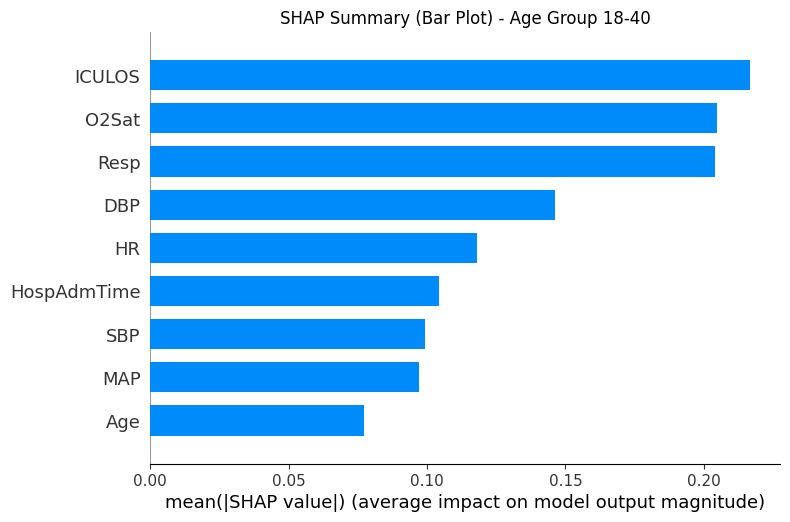

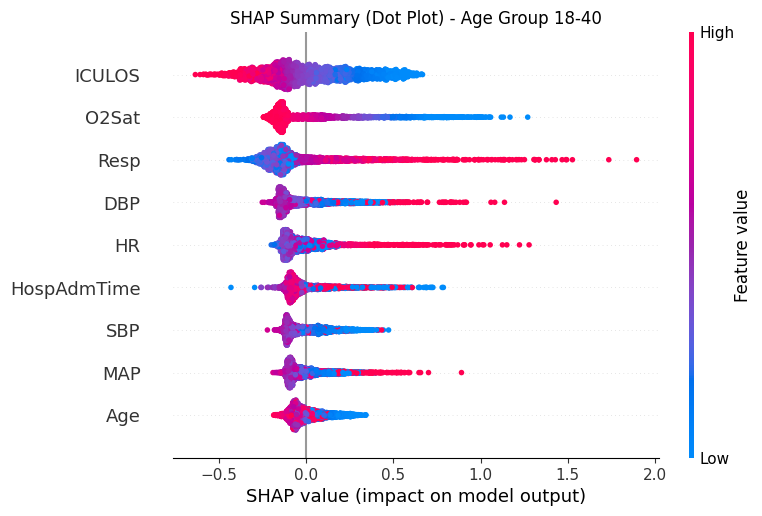

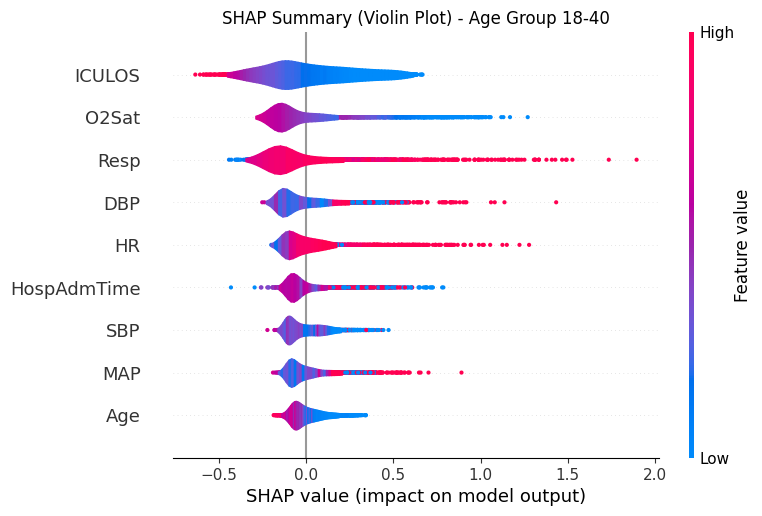

<Figure size 640x480 with 0 Axes>

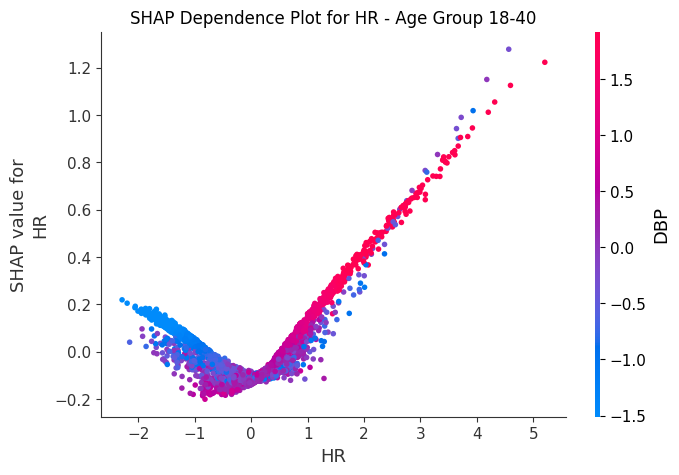

Age Group: 41-65
Accuracy: 0.881650984287262


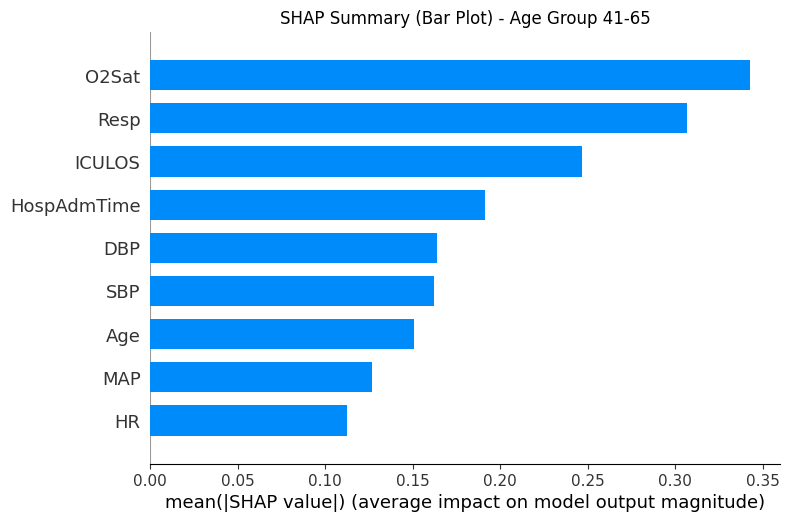

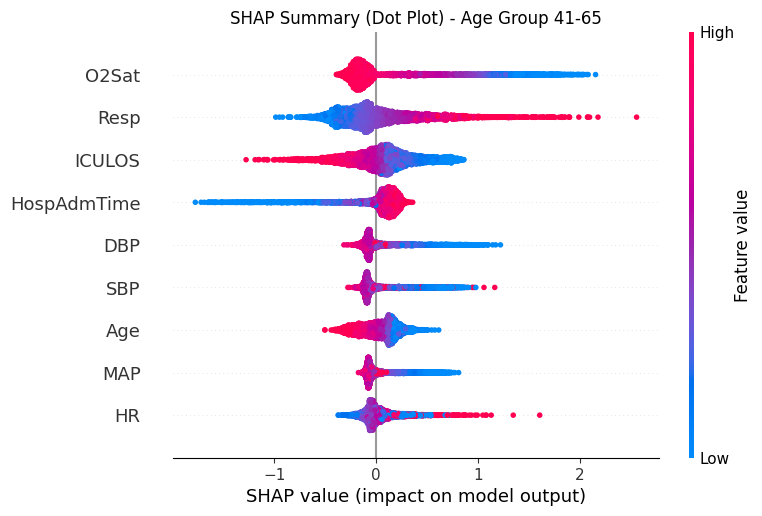

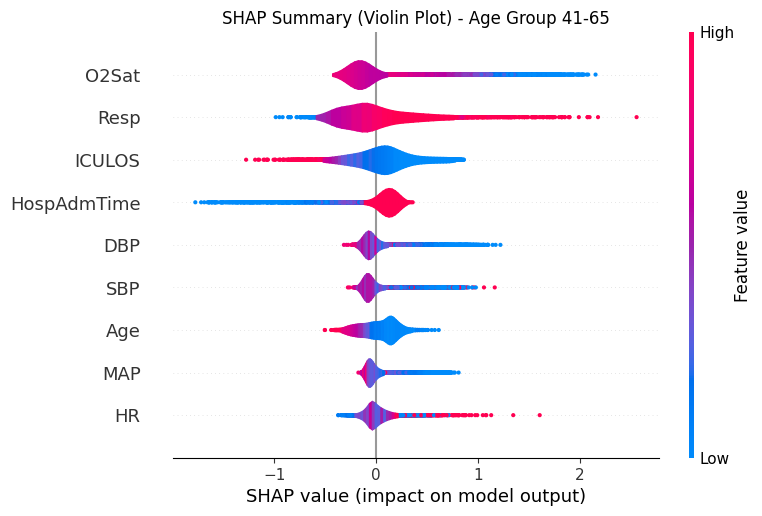

<Figure size 640x480 with 0 Axes>

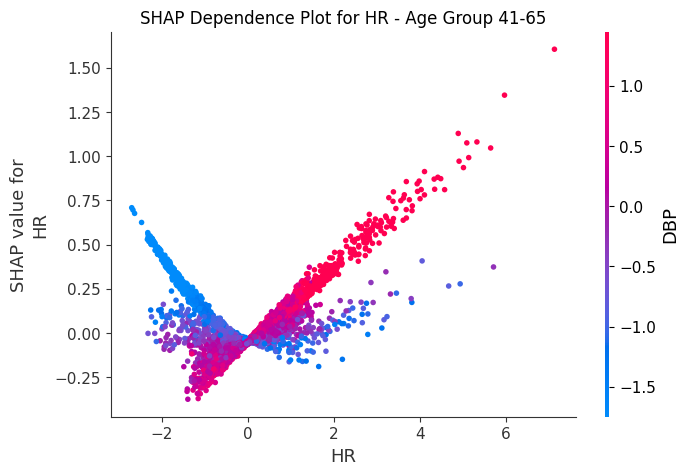

Age Group: 66+
Accuracy: 0.876107931137085


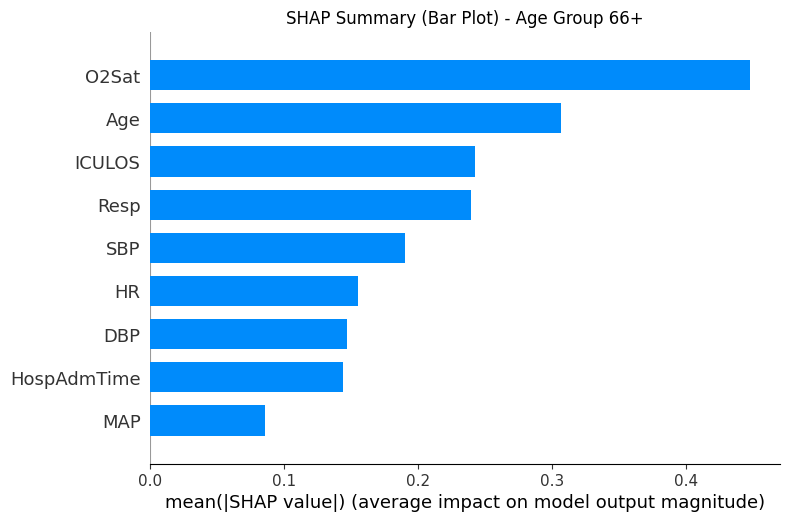

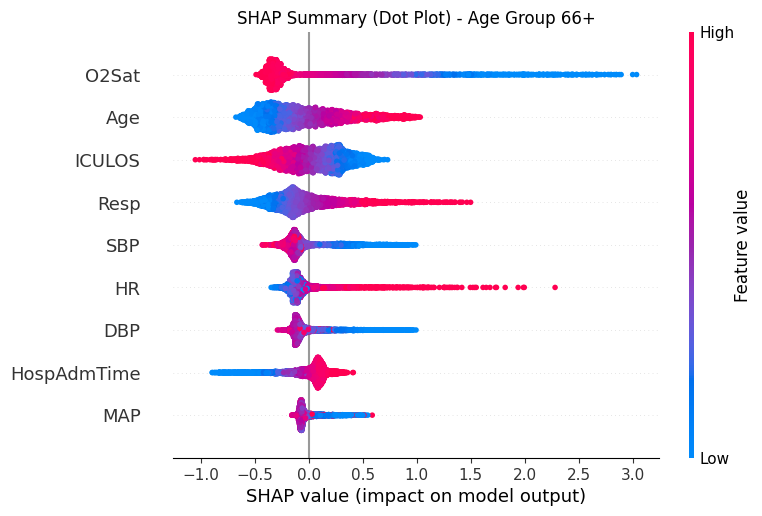

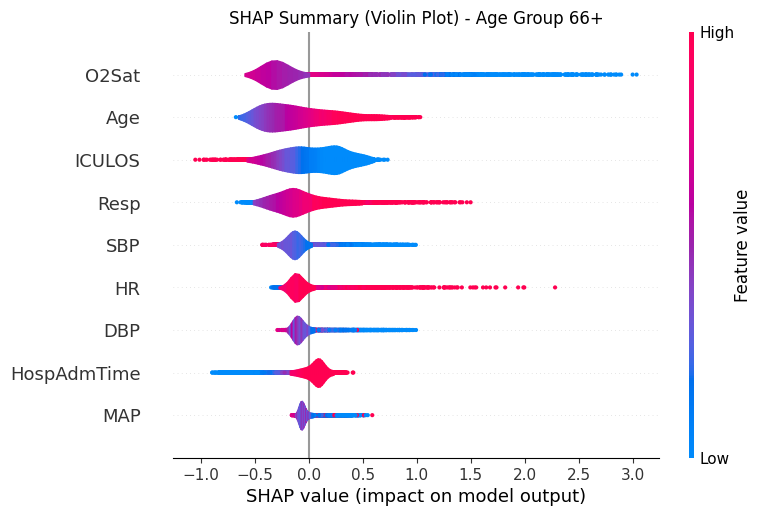

<Figure size 640x480 with 0 Axes>

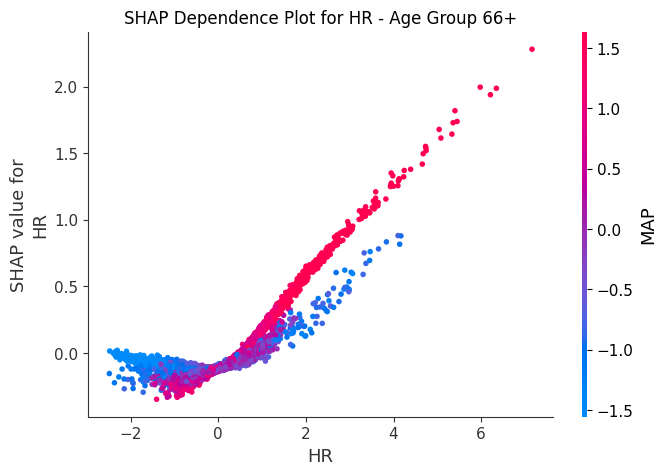

In [57]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import shap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

df2 = df2.reset_index(drop=True)
age_groups = {
    "18-40": df2[(df2["Age"] >= 18) & (df2["Age"] <= 40)].reset_index(drop=True),
    "41-65": df2[(df2["Age"] >= 41) & (df2["Age"] <= 65)].reset_index(drop=True),
    "66+": df2[df2["Age"] >= 66].reset_index(drop=True)
}

class TabularNN(nn.Module):
    def __init__(self, input_dim):
        super(TabularNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.relu1 = nn.ReLU()
        self.drop1 = nn.Dropout(0.1)
        self.fc2 = nn.Linear(64, 32)
        self.relu2 = nn.ReLU()
        self.drop2 = nn.Dropout(0.1)
        self.fc3 = nn.Linear(32, 1)
    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.drop1(x)
        x = self.relu2(self.fc2(x))
        x = self.drop2(x)
        x = self.fc3(x)
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

for group_name, group_df in age_groups.items():
    print("Age Group:", group_name)
    X = group_df.drop("label", axis=1).values
    y = group_df["label"].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    X_train_t = torch.tensor(X_train, dtype=torch.float32).to(device)
    y_train_t = torch.tensor(y_train, dtype=torch.float32).to(device)
    X_test_t = torch.tensor(X_test, dtype=torch.float32).to(device)
    y_test_t = torch.tensor(y_test, dtype=torch.float32).to(device)
    model = TabularNN(X_train.shape[1]).to(device)
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    for epoch in range(50):
        model.train()
        optimizer.zero_grad()
        logits = model(X_train_t).squeeze()
        loss = criterion(logits, y_train_t)
        loss.backward()
        optimizer.step()
    model.eval()
    with torch.no_grad():
        test_logits = model(X_test_t).squeeze()
        preds = (torch.sigmoid(test_logits) > 0.5).float()
        acc = (preds == y_test_t).float().mean()
    print("Accuracy:", acc.item())
    model.cpu().eval()
    background_data = X_train[:100]
    explainer = shap.DeepExplainer(model, torch.tensor(background_data, dtype=torch.float32))
    shap_values = explainer.shap_values(torch.tensor(X_test, dtype=torch.float32))
    if isinstance(shap_values, list) and len(shap_values) == 1:
        shap_values = shap_values[0]
    if shap_values.ndim == 3 and shap_values.shape[-1] == 1:
        shap_values = shap_values.squeeze(-1)
    feature_names = group_df.drop("label", axis=1).columns
    plt.figure()
    shap.summary_plot(shap_values, X_test, feature_names=feature_names, plot_type="bar", show=False)
    plt.title(f"SHAP Summary (Bar Plot) - Age Group {group_name}")
    plt.show()
    plt.figure()
    shap.summary_plot(shap_values, X_test, feature_names=feature_names, plot_type="dot", show=False)
    plt.title(f"SHAP Summary (Dot Plot) - Age Group {group_name}")
    plt.show()
    plt.figure()
    shap.summary_plot(shap_values, X_test, feature_names=feature_names, plot_type="violin", show=False)
    plt.title(f"SHAP Summary (Violin Plot) - Age Group {group_name}")
    plt.show()
    plt.figure()
    shap.dependence_plot(0, shap_values, X_test, feature_names=feature_names, show=False)
    plt.title(f"SHAP Dependence Plot for {feature_names[0]} - Age Group {group_name}")
    plt.show()


**Reinforcement Learning for Optimal Treatment Plan**

Episode 50/2000, AvgReward(Last50)=-34.52
Episode 100/2000, AvgReward(Last50)=-28.56
Episode 150/2000, AvgReward(Last50)=-25.86
Episode 200/2000, AvgReward(Last50)=-23.74
Episode 250/2000, AvgReward(Last50)=-20.22
Episode 300/2000, AvgReward(Last50)=-17.30
Episode 350/2000, AvgReward(Last50)=-19.28
Episode 400/2000, AvgReward(Last50)=-12.32
Episode 450/2000, AvgReward(Last50)=-12.36
Episode 500/2000, AvgReward(Last50)=-3.32
Episode 550/2000, AvgReward(Last50)=-3.58
Episode 600/2000, AvgReward(Last50)=-5.48
Episode 650/2000, AvgReward(Last50)=3.16
Episode 700/2000, AvgReward(Last50)=2.02
Episode 750/2000, AvgReward(Last50)=2.86
Episode 800/2000, AvgReward(Last50)=13.30
Episode 850/2000, AvgReward(Last50)=13.58
Episode 900/2000, AvgReward(Last50)=25.48
Episode 950/2000, AvgReward(Last50)=18.90
Episode 1000/2000, AvgReward(Last50)=27.14
Episode 1050/2000, AvgReward(Last50)=18.40
Episode 1100/2000, AvgReward(Last50)=36.90
Episode 1150/2000, AvgReward(Last50)=33.14
Episode 1200/2000, AvgRew

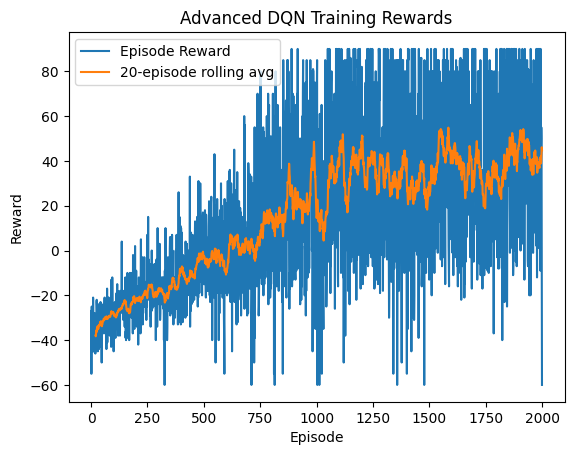

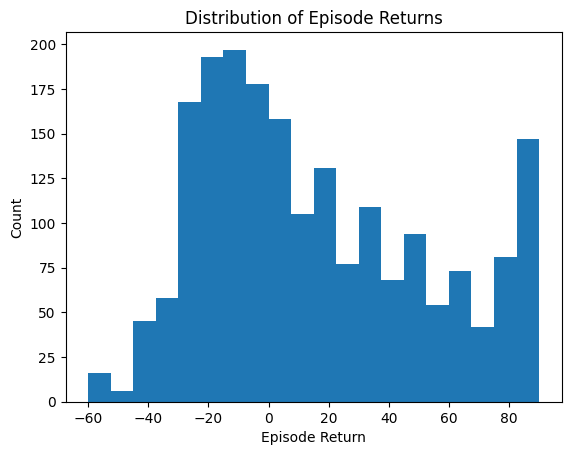

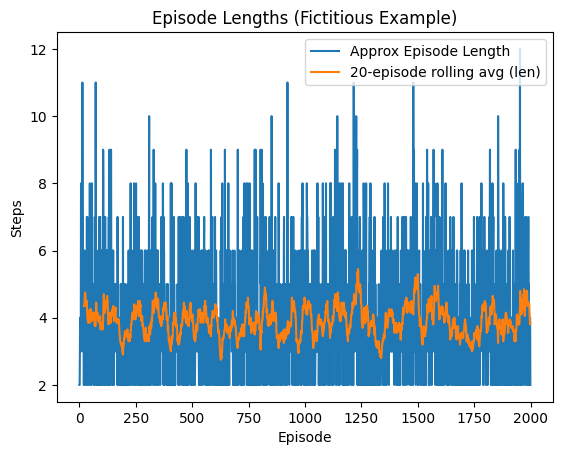


=== Test Episode 1 ===
Age = 61.8, Age Group = 41-65
Step 1:
  Current Vitals -> HR=30.5, O2Sat=89.0, SBP=89.5, DBP=47.0, MAP=64.2, Resp=21.7
  Action Chosen -> O2+Vaso
  Reward Gained -> 3.00
Step 2:
  Current Vitals -> HR=40.0, O2Sat=91.0, SBP=92.5, DBP=49.8, MAP=66.8, Resp=21.9
  Action Chosen -> O2+Vaso
  Reward Gained -> 3.00
Step 3:
  Current Vitals -> HR=40.3, O2Sat=92.2, SBP=95.9, DBP=50.2, MAP=68.7, Resp=22.1
  Action Chosen -> O2+Vaso
  Reward Gained -> 3.00
Step 4:
  Current Vitals -> HR=40.0, O2Sat=93.0, SBP=99.1, DBP=52.1, MAP=71.3, Resp=21.0
  Action Chosen -> O2+Vaso
  Reward Gained -> 3.00
Step 5:
  Current Vitals -> HR=40.6, O2Sat=94.4, SBP=103.1, DBP=53.3, MAP=73.8, Resp=21.1
  Action Chosen -> O2+Vaso
  Reward Gained -> 3.00
Step 6:
  Current Vitals -> HR=41.5, O2Sat=96.1, SBP=106.0, DBP=55.4, MAP=76.8, Resp=21.8
  Action Chosen -> O2+Vaso
  Reward Gained -> 3.00
Step 7:
  Current Vitals -> HR=41.5, O2Sat=97.1, SBP=108.5, DBP=56.2, MAP=79.3, Resp=22.8
  Action Chose

In [55]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import random
import math
import matplotlib.pyplot as plt
import pandas as pd
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
class SepsisEnv:
    def __init__(self, csv_file):
        self.data = pd.read_csv(csv_file)
        self.data = self.data[self.data["label"]==1].copy()
        self.data_18_40 = self.data[(self.data["Age"]>=18)&(self.data["Age"]<=40)]
        self.data_41_65 = self.data[(self.data["Age"]>=41)&(self.data["Age"]<=65)]
        self.data_66_up = self.data[(self.data["Age"]>=66)]
        self.observation_dim = 6
        self.action_dim = 8
        self.max_steps = 30
        self.current_df = None
        self.current_age = None
        self.current_age_group = None
        self.reset()
    def reset(self):
        group_choice = random.choice(["18_40","41_65","66_up"])
        if group_choice=="18_40" and len(self.data_18_40)>0:
            self.current_df = self.data_18_40
        elif group_choice=="41_65" and len(self.data_41_65)>0:
            self.current_df = self.data_41_65
        else:
            if len(self.data_66_up)>0:
                self.current_df = self.data_66_up
            else:
                self.current_df = self.data
        row = self.current_df.sample(n=1).iloc[0]
        self.current_age = float(row["Age"])
        if self.current_age<=40:
            self.current_age_group = "18-40"
        elif self.current_age<=65:
            self.current_age_group = "41-65"
        else:
            self.current_age_group = "66+"
        self.state = np.array([
            row["HR"],
            row["O2Sat"],
            row["SBP"],
            row["DBP"],
            row["MAP"],
            row["Resp"]
        ], dtype=np.float32)
        self.steps = 0
        return self.state
    def step(self, action):
        HR, O2Sat, SBP, DBP, MAP, Resp = self.state
        reward=0.0
        done=False
        recommended_actions=[]
        if Resp>30 and O2Sat<92:
            recommended_actions.append(4)
        elif Resp>30:
            recommended_actions.append(2)
        elif Resp>20 and O2Sat<92:
            recommended_actions.append(1)
        elif Resp>20:
            recommended_actions.append(1)
        if (SBP<90 or DBP<60 or MAP<65):
            if len(recommended_actions)==0:
                recommended_actions.append(3)
            else:
                new_actions=[]
                for ra in recommended_actions:
                    if ra==1:
                        new_actions.append(5)
                    elif ra==2:
                        new_actions.append(6)
                    elif ra==4:
                        new_actions.append(7)
                    else:
                        new_actions.append(3)
                recommended_actions=new_actions
        if len(recommended_actions)>0:
            if action in recommended_actions:
                reward+=3.0
            else:
                reward-=2.0
        else:
            if action!=0:
                reward-=1.0
        drift=np.random.normal(0,1,size=6)*0.5
        new_state=self.state+drift
        if action in [1,4,5,7]:
            new_state[1]+=np.random.uniform(1.0,2.0)
        if action in [2,4,6,7]:
            new_state[5]-=np.random.uniform(1.0,2.0)
        if action in [3,5,6,7]:
            new_state[2]+=np.random.uniform(2.0,4.0)
            new_state[3]+=np.random.uniform(1.0,2.0)
            new_state[4]+=np.random.uniform(2.0,3.0)
        new_state[0]=np.clip(new_state[0],40,180)
        new_state[1]=np.clip(new_state[1],70,100)
        new_state[2]=np.clip(new_state[2],50,200)
        new_state[3]=np.clip(new_state[3],30,130)
        new_state[4]=np.clip(new_state[4],30,140)
        new_state[5]=np.clip(new_state[5], 8,50)
        self.state=new_state
        self.steps+=1
        if self.steps>=self.max_steps:
            done=True
        return self.state,reward,done,{}
class DuelingQNetwork(nn.Module):
    def __init__(self, state_dim, action_dim):
        super().__init__()
        self.common=nn.Sequential(
            nn.Linear(state_dim,256),
            nn.ReLU(),
            nn.Linear(256,256),
            nn.ReLU()
        )
        self.value_head=nn.Sequential(
            nn.Linear(256,128),
            nn.ReLU(),
            nn.Linear(128,1)
        )
        self.adv_head=nn.Sequential(
            nn.Linear(256,128),
            nn.ReLU(),
            nn.Linear(128,action_dim)
        )
    def forward(self,x):
        x=self.common(x)
        v=self.value_head(x)
        a=self.adv_head(x)
        q=v+(a-a.mean(dim=1,keepdim=True))
        return q
class PrioritizedReplayBuffer:
    def __init__(self, capacity, alpha=0.6):
        self.capacity=capacity
        self.alpha=alpha
        self.buffer=[]
        self.priorities=[]
        self.pos=0
    def push(self,transition,priority=1.0):
        if len(self.buffer)<self.capacity:
            self.buffer.append(transition)
            self.priorities.append(priority)
        else:
            self.buffer[self.pos]=transition
            self.priorities[self.pos]=priority
        self.pos=(self.pos+1)%self.capacity
    def sample(self,batch_size,beta=0.4):
        if len(self.buffer)==0:
            return [],[],[],[],[],np.array([])
        probs=np.array(self.priorities)**self.alpha
        probs=probs/probs.sum()
        indices=np.random.choice(len(self.buffer),batch_size,p=probs)
        samples=[self.buffer[i] for i in indices]
        total=len(self.buffer)
        weights=(total*probs[indices])**(-beta)
        weights=weights/weights.max()
        states,actions,rewards,next_states,dones=[],[],[],[],[]
        for s,a,r,n,d in samples:
            states.append(s)
            actions.append(a)
            rewards.append(r)
            next_states.append(n)
            dones.append(d)
        return (
            np.array(states),
            np.array(actions),
            np.array(rewards,dtype=np.float32),
            np.array(next_states),
            np.array(dones,dtype=np.float32),
            indices,
            weights.astype(np.float32)
        )
    def update_priorities(self,batch_indices,batch_priorities):
        for idx,prio in zip(batch_indices,batch_priorities):
            self.priorities[idx]=prio
    def __len__(self):
        return len(self.buffer)
def compute_td_error(q_values,actions,rewards,next_states,dones,gamma,online_net,target_net):
    q_value=q_values.gather(1, actions.unsqueeze(1)).squeeze(1)
    with torch.no_grad():
        next_online_q=online_net(next_states)
        next_actions=next_online_q.argmax(dim=1)
        next_target_q=target_net(next_states)
        next_q=next_target_q.gather(1,next_actions.unsqueeze(1)).squeeze(1)
        target=rewards+gamma*(1-dones)*next_q
    td_error=target-q_value
    return td_error,target
class AdvancedDQNAgent:
    def __init__(self,
                 state_dim,
                 action_dim,
                 lr=1e-4,
                 gamma=0.99,
                 batch_size=64,
                 buffer_size=100000,
                 min_replay_size=1000,
                 update_freq=50,
                 target_sync_freq=500,
                 alpha=0.6,
                 beta_start=0.4,
                 beta_frames=100000):
        self.state_dim=state_dim
        self.action_dim=action_dim
        self.gamma=gamma
        self.batch_size=batch_size
        self.lr=lr
        self.buffer=PrioritizedReplayBuffer(buffer_size,alpha=alpha)
        self.min_replay_size=min_replay_size
        self.update_freq=update_freq
        self.target_sync_freq=target_sync_freq
        self.beta_start=beta_start
        self.beta_frames=beta_frames
        self.frame=1
        self.online_net=DuelingQNetwork(state_dim,action_dim).to(device)
        self.target_net=DuelingQNetwork(state_dim,action_dim).to(device)
        self.target_net.load_state_dict(self.online_net.state_dict())
        self.optimizer=optim.Adam(self.online_net.parameters(),lr=self.lr)
        self.epsilon_start=1.0
        self.epsilon_end=0.01
        self.epsilon_decay=30000
    def act(self,state):
        epsilon=max(self.epsilon_end,
                    self.epsilon_start-(self.epsilon_start-self.epsilon_end)*self.frame/self.epsilon_decay)
        self.frame+=1
        if random.random()<epsilon:
            return random.randint(0,self.action_dim-1)
        else:
            with torch.no_grad():
                s=torch.tensor(state,dtype=torch.float32).unsqueeze(0).to(device)
                q_values=self.online_net(s)
                action=q_values.argmax(dim=1).item()
            return action
    def push_experience(self,state,action,reward,next_state,done):
        priority=max(self.buffer.priorities) if self.buffer.buffer else 1.0
        self.buffer.push((state,action,reward,next_state,done),priority=priority)
    def beta_by_frame(self,frame_idx):
        return min(1.0,self.beta_start+frame_idx*(1.0-self.beta_start)/self.beta_frames)
    def train_step(self):
        if len(self.buffer)<self.min_replay_size:
            return None
        beta=self.beta_by_frame(self.frame)
        sample_result=self.buffer.sample(self.batch_size,beta=beta)
        (states,actions,rewards,next_states,dones,indices,weights)=sample_result[:7]
        states_t=torch.as_tensor(states,dtype=torch.float32).to(device)
        actions_t=torch.as_tensor(actions,dtype=torch.long).to(device)
        rewards_t=torch.as_tensor(rewards,dtype=torch.float32).to(device)
        next_states_t=torch.as_tensor(next_states,dtype=torch.float32).to(device)
        dones_t=torch.as_tensor(dones,dtype=torch.float32).to(device)
        weights_t=torch.as_tensor(weights,dtype=torch.float32).to(device)
        current_q=self.online_net(states_t)
        td_err,target=compute_td_error(
            current_q,actions_t,rewards_t,
            next_states_t,dones_t,
            self.gamma,self.online_net,self.target_net
        )
        loss=(td_err.pow(2)*weights_t).mean()
        abs_td=torch.abs(td_err).detach().cpu().numpy()+1e-6
        self.buffer.update_priorities(indices,abs_td)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
        return loss.item()
    def sync_target(self):
        self.target_net.load_state_dict(self.online_net.state_dict())
def train_agent(num_episodes=500, csv_file="GAN_balanced_data_names_modified.csv"):
    env=SepsisEnv(csv_file)
    agent=AdvancedDQNAgent(
        state_dim=env.observation_dim,
        action_dim=env.action_dim
    )
    episode_rewards=[]
    total_steps=0
    for ep in range(num_episodes):
        state=env.reset()
        done=False
        ep_reward=0
        while not done:
            action=agent.act(state)
            next_state,rew,done,_=env.step(action)
            agent.push_experience(state,action,rew,next_state,done)
            state=next_state
            ep_reward+=rew
            total_steps+=1
            loss_val=agent.train_step()
            if total_steps%agent.update_freq==0 and loss_val is not None:
                if total_steps%agent.target_sync_freq==0:
                    agent.sync_target()
        episode_rewards.append(ep_reward)
        if (ep+1)%50==0:
            avg_last_50=np.mean(episode_rewards[-50:])
            print(f"Episode {ep+1}/{num_episodes}, AvgReward(Last50)={avg_last_50:.2f}")
    return agent,episode_rewards
action_dict={
    0:"No Intervention",
    1:"Oxygen",
    2:"Ventilation",
    3:"Vasopressors",
    4:"O2+Vent",
    5:"O2+Vaso",
    6:"Vent+Vaso",
    7:"O2+Vent+Vaso"
}
def test_agent(agent, csv_file="GAN_balanced_data_names_modified.csv", num_episodes=3):
    env=SepsisEnv(csv_file)
    for i in range(num_episodes):
        state=env.reset()
        done=False
        total_r=0.0
        step_count=0
        print(f"\n=== Test Episode {i+1} ===")
        print(f"Age = {env.current_age:.1f}, Age Group = {env.current_age_group}")
        while not done:
            action=agent.act(state)
            next_state,reward,done,_=env.step(action)
            print(f"Step {step_count+1}:")
            print(f"  Current Vitals -> HR={state[0]:.1f}, O2Sat={state[1]:.1f}, "
                  f"SBP={state[2]:.1f}, DBP={state[3]:.1f}, MAP={state[4]:.1f}, Resp={state[5]:.1f}")
            print(f"  Action Chosen -> {action_dict[action]}")
            print(f"  Reward Gained -> {reward:.2f}")
            total_r+=reward
            step_count+=1
            state=next_state
            if step_count>=50:
                done=True
        print(f"Episode {i+1} ended in {step_count} steps, Total Reward = {total_r:.2f}")
if __name__=="__main__":
    agent,rewards=train_agent(num_episodes=2000, csv_file="GAN_balanced_data_names_modified.csv")
    window=20
    rolling_avg=[np.mean(rewards[i-window:i]) for i in range(len(rewards))]
    plt.figure()
    plt.plot(rewards,label="Episode Reward")
    plt.plot(rolling_avg,label=f"{window}-episode rolling avg")
    plt.title("Advanced DQN Training Rewards")
    plt.xlabel("Episode")
    plt.ylabel("Reward")
    plt.legend()
    plt.show()
    plt.figure()
    plt.hist(rewards,bins=20)
    plt.title("Distribution of Episode Returns")
    plt.xlabel("Episode Return")
    plt.ylabel("Count")
    plt.show()
    approx_steps=[min(30,2+int(abs(np.random.normal(0,3)))) for _ in range(len(rewards))]
    step_roll=[np.mean(approx_steps[i-window:i]) for i in range(len(approx_steps))]
    plt.figure()
    plt.plot(approx_steps,label="Approx Episode Length")
    plt.plot(step_roll,label=f"{window}-episode rolling avg (len)")
    plt.title("Episode Lengths (Fictitious Example)")
    plt.xlabel("Episode")
    plt.ylabel("Steps")
    plt.legend()
    plt.show()
    test_agent(agent, csv_file="GAN_balanced_data_names_modified.csv", num_episodes=36)


**Balancing and describing datasets using smote and adasyn**

In [ ]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE, ADASYN
df = pd.read_csv("Updated_Non-Time-Series_Sepsis_Dataset_Ordered.csv")
X = df.drop("label", axis=1)
y = df["label"]
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)
df_smote_balanced = pd.concat([pd.DataFrame(X_smote, columns=X.columns), pd.Series(y_smote, name="label")], axis=1)
df_smote_balanced.to_csv("SMOTE_balanced_data.csv", index=False)
adasyn = ADASYN()
X_adasyn, y_adasyn = adasyn.fit_resample(X, y)
df_adasyn_balanced = pd.concat([pd.DataFrame(X_adasyn, columns=X.columns), pd.Series(y_adasyn, name="label")], axis=1)
df_adasyn_balanced.to_csv("ADASYN_balanced_data.csv", index=False)


In [ ]:
df3 = df2
df4 = pd.read_csv("SMOTE_balanced_data.csv")
df5 = pd.read_csv("ADASYN_balanced_data.csv")

In [ ]:
df3.info()
df4.info()
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66664 entries, 0 to 66663
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HR           66664 non-null  float64
 1   O2Sat        66664 non-null  float64
 2   SBP          66664 non-null  float64
 3   MAP          66664 non-null  float64
 4   DBP          66664 non-null  float64
 5   Resp         66664 non-null  float64
 6   Age          66664 non-null  float64
 7   HospAdmTime  66664 non-null  float64
 8   ICULOS       66664 non-null  float64
 9   label        66664 non-null  float64
dtypes: float64(10)
memory usage: 5.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66664 entries, 0 to 66663
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HR           66664 non-null  float64
 1   O2Sat        66664 non-null  float64
 2   SBP          66664 non-null  float64
 3   MAP          66664 non

In [ ]:
print("Custom GAN")
df3.describe()

Custom GAN


,HR,O2Sat,SBP,MAP,DBP,Resp,Age,HospAdmTime,ICULOS,label
count,66664.000000,66664.000000,66664.000000,66664.000000,66664.000000,66664.000000,66664.000000,66664.000000,66664.000000,66664.000000
mean,83.216144,90.567436,115.352495,76.762503,59.803356,18.956241,58.370166,-15.196233,16.626167,0.500000
std,21.837058,13.227041,29.277456,20.116046,14.366079,4.444782,20.350703,24.514666,7.546277,0.500004
min,22.470325,23.580223,30.123676,17.625551,14.250435,5.996705,18.002075,-125.041504,1.000000,0.000000
25%,70.018049,88.092745,97.616138,64.566944,52.765555,16.263199,43.191761,-23.950000,10.650000,0.000000
50%,81.647393,96.800000,116.569444,77.432576,61.211238,18.200000,59.432625,-5.750000,16.000000,0.500000
75%,93.611745,98.030640,129.764706,86.000000,65.333333,20.956784,74.000000,-0.030000,22.107143,1.000000
max,258.529602,100.000000,358.752411,246.707855,186.249817,49.377369,100.000000,42.846077,52.130435,1.000000


In [ ]:
print("smote")
df4.describe()

smote


,HR,O2Sat,SBP,MAP,DBP,Resp,Age,HospAdmTime,ICULOS,label
count,66664.000000,66664.000000,66664.000000,66664.000000,66664.000000,66664.000000,66664.000000,66664.000000,66664.000000,66664.000000
mean,84.502493,97.626970,120.262621,79.661726,61.736612,18.363184,61.704993,-15.018895,17.081435,0.500000
std,12.163292,1.249472,12.711896,7.647797,4.740043,2.261460,16.459737,26.482907,8.671171,0.500004
min,45.800000,92.214286,79.428571,52.103448,46.000000,10.067568,18.240000,-117.560000,1.000000,0.000000
25%,75.882159,96.800000,111.290072,74.312391,58.963127,16.900000,51.000000,-15.446446,9.753610,0.000000
50%,83.820513,97.760000,120.113651,79.507367,62.000000,18.160714,63.210000,-2.380000,16.500000,0.500000
75%,93.129630,98.557244,127.977273,84.595610,64.129835,19.759387,74.480000,-0.030000,23.621772,1.000000
max,121.363636,100.000000,166.130435,115.500000,80.000000,28.000000,100.000000,23.990000,52.130435,1.000000


In [ ]:
print("adasyn")
df5.describe()

adasyn


,HR,O2Sat,SBP,MAP,DBP,Resp,Age,HospAdmTime,ICULOS,label
count,66998.000000,66998.000000,66998.000000,66998.000000,66998.000000,66998.000000,66998.000000,66998.000000,66998.000000,66998.000000
mean,84.322749,97.630159,120.385522,79.727165,61.737032,18.347466,61.705466,-15.375708,17.390410,0.502493
std,12.102791,1.248941,12.689280,7.642204,4.751237,2.249790,16.464528,26.725502,8.581989,0.499998
min,45.800000,92.214286,79.428571,52.103448,46.000000,10.067568,18.240000,-117.560000,1.000000,0.000000
25%,75.722353,96.808511,111.436054,74.385312,58.958432,16.888889,51.000000,-16.569412,10.128366,0.000000
50%,83.700000,97.756098,120.170791,79.540528,62.000000,18.157895,63.406627,-2.580000,17.062934,1.000000
75%,92.902693,98.564041,128.227273,84.678554,64.200000,19.750000,74.360000,-0.030000,23.866667,1.000000
max,121.363636,100.000000,166.130435,115.500000,80.000000,28.000000,100.000000,23.990000,52.130435,1.000000


In [ ]:
print("Original Dataset")
df.describe()

Original Dataset


,HR,O2Sat,SBP,MAP,DBP,Resp,Age,HospAdmTime,ICULOS,label
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,82.925130,97.528570,121.432962,80.501435,62.069736,18.091542,61.464275,-16.393084,19.106998,0.048744
std,11.792514,1.290258,12.787833,7.899476,5.026883,2.230988,16.591809,26.535305,7.352650,0.215336
min,45.800000,92.214286,79.428571,52.103448,46.000000,10.067568,18.240000,-117.560000,1.000000,0.000000
25%,74.864865,96.673077,112.518887,74.917500,59.210835,16.661765,50.930000,-19.840000,12.809524,0.000000
50%,82.552632,97.666667,120.862069,80.130753,62.000000,18.000000,63.000000,-4.310000,19.775986,0.000000
75%,90.634615,98.465517,129.458615,85.602393,64.856113,19.424242,74.000000,-0.030000,24.375000,0.000000
max,121.363636,100.000000,166.130435,115.500000,80.000000,28.000000,100.000000,23.990000,52.130435,1.000000
